# SVM for classification

Load IRIS dataset, check its contents:


In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [3]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [4]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

1.0

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [6]:
import numpy as np
X=iris.data[:,0:2]
y=iris.target
mask = iris.target < 2
y_filtered = y[mask]
x_filtered = X[mask]


x_train, x_test, y_train, y_test = train_test_split(x_filtered,y_filtered ,test_size=0.2)
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

print("accuracy:", svm.score(x_test, y_test))

accuracy: 1.0


In [9]:
#correction
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, :2] , iris.target
X,y = X[y<2], y[y<2]
x_train, x_test, y_train, y_test = train_test_split(X,y ,test_size=0.2)
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

print("accuracy:", svm.score(x_test, y_test))

accuracy: 1.0


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

In [10]:
import matplotlib.pyplot as plt


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

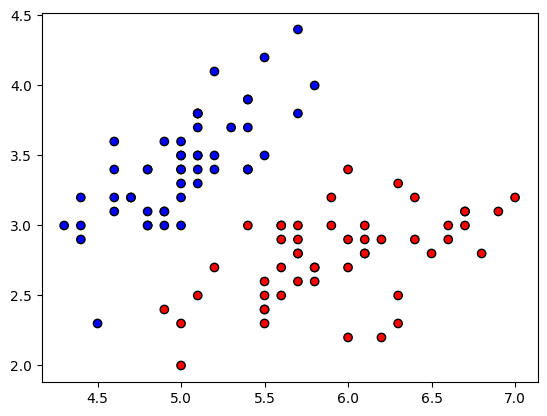

In [11]:

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
plt.show()

In [12]:
X=iris.data[iris.target!=2,0:2]
print(X.shape)
y=iris.target[iris.target!=2]
SVMmodel=SVC(kernel='linear', C=1000)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,y,test_size=0.2)
SVMmodel.fit(X_train_1,y_train_1)







(100, 2)


SVC(C=1000, kernel='linear')

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

W [[ 6.28424343 -5.14207315]]
b [-17.45196175]


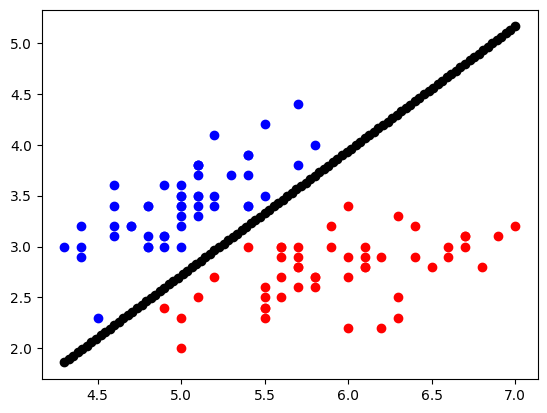

In [13]:
supvectors=SVMmodel.support_vectors_



W=SVMmodel.coef_
b=SVMmodel.intercept_
print('W',W)
print('b',b)
x1=np.linspace(np.min(X[:,0]),np.max(X[:,0]),100)
x2=-b[0]/W[0,1]-W[0,0]/W[0,1]*x1
plt.scatter(X[y==0,0], X[y==0,1], color='blue')
plt.scatter(X[y==1,0], X[y==1,1], color='red')
plt.scatter(x1,x2, c='black')

plt.show()

# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

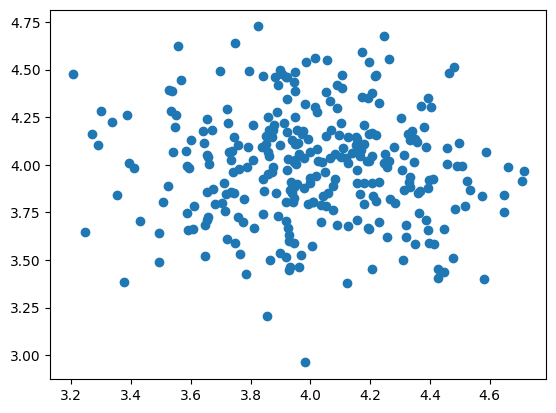

In [14]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

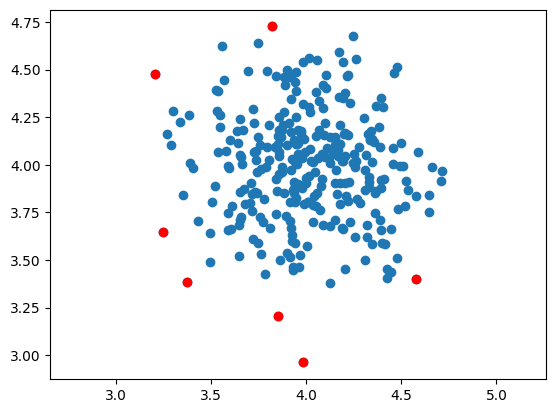

In [15]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

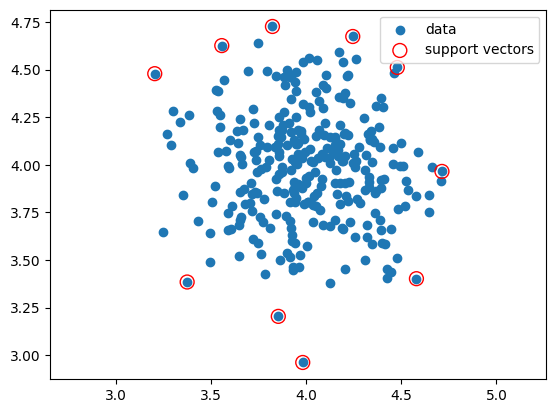

In [16]:
support_vectors = SVMmodelOne.support_vectors_

plt.scatter(x[:,0], x[:,1], label='data')
plt.scatter(support_vectors[:,0], support_vectors[:,1],
            s=100, facecolors='none', edgecolors='red',
            label='support vectors')

plt.axis('equal')
plt.legend()
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


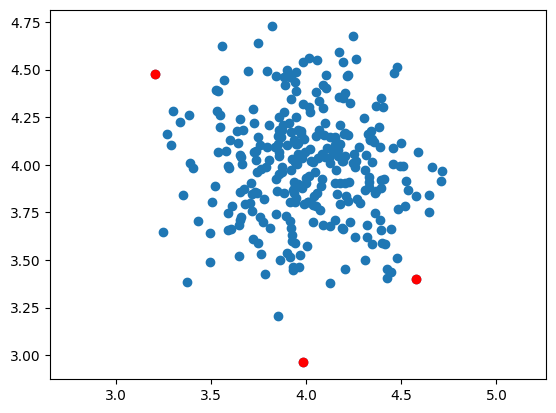

In [17]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()